In [1]:
import gensim

In [2]:
from gensim.models import word2vec,keyedvectors

In [3]:
import gensim.downloader as api

In [4]:
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
vec_king = model['king']

In [7]:
vec_king.shape

(300,)

In [11]:
model.cosine_similarities(model['prince'],[model['queen']])

array([0.55340946], dtype=float32)

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
import numpy as np

In [22]:
words = ['prince', 'queen', 'king', 'man', 'woman', 'throne', 'princess']

# Get their vectors
vectors = np.array([model[word] for word in words])


In [24]:
vectors.shape

(7, 300)

In [25]:
# Reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced = tsne.fit_transform(vectors)

-2.7817879 -38.61462
-45.735863 -19.047714
-14.580069 3.3396258
-66.38452 33.57875
-90.6495 7.864064
31.773344 -6.8427653
-38.685814 -55.346107


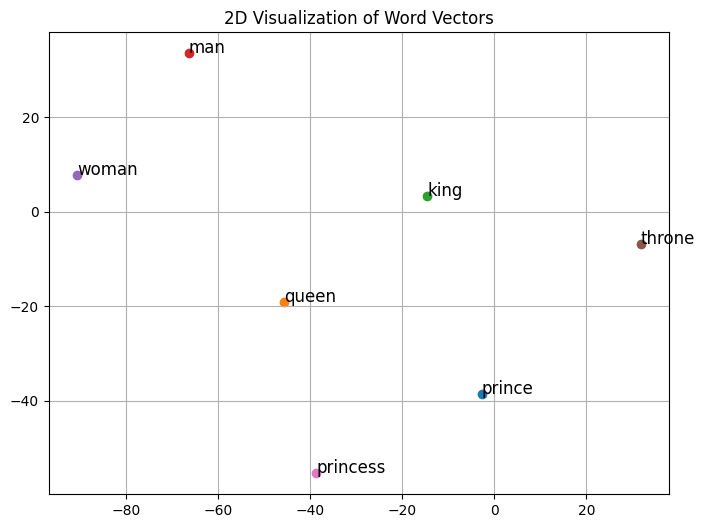

In [26]:
# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    print(x,y)
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, word, fontsize=12)
plt.title("2D Visualization of Word Vectors")
plt.grid(True)
plt.show()

In [30]:
try:
  print(model.most_similar('ball'))
except Exception as e:
  print(e)

[('balls', 0.6992624402046204), ('upfield', 0.6896207332611084), ('downfield', 0.639072835445404), ('dribbler', 0.6218728423118591), ('balll', 0.6199931502342224), ('dribble', 0.616877555847168), ('ball_squirted', 0.6110138297080994), ('leftfooted', 0.6020259261131287), ('puck', 0.5981723666191101), ('mishit', 0.5948783159255981)]


In [36]:
try:
  v=model.cosine_similarities(model['prince'],[model['queen']])
  print(v)
except Exception as e:
  print(e)

[0.55340946]


In [37]:

vec=model['king']-model['man']+model['woman']


In [38]:
model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [39]:
import pandas as pd

In [41]:
df = pd.read_csv('/content/SMSSpamCollection.txt',sep='\t',names=['label','message'])

**READ THE DATA**

In [42]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


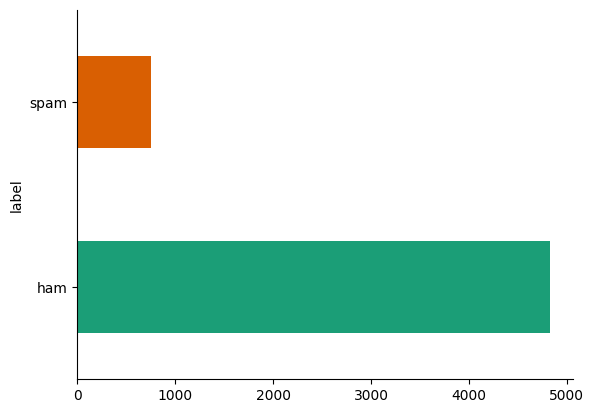

In [43]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
import re
import nltk

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
from nltk.corpus import stopwords

In [51]:
from nltk.stem.porter import PorterStemmer

In [52]:
ps = PorterStemmer()

In [53]:
ps


<PorterStemmer>

In [55]:
corpus =[]
for i in range(0,len(df)):
  review = re.sub('[^a-zA-Z]',' ',df['message'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))

In [61]:
X = cv.fit_transform(corpus)

In [62]:

cv.vocabulary_

{'go': 795,
 'point': 1607,
 'crazi': 456,
 'avail': 114,
 'bugi': 225,
 'great': 852,
 'world': 2429,
 'la': 1103,
 'cine': 352,
 'got': 840,
 'wat': 2337,
 'ok': 1481,
 'lar': 1114,
 'joke': 1071,
 'wif': 2395,
 'free': 709,
 'entri': 612,
 'wkli': 2419,
 'comp': 406,
 'win': 2400,
 'cup': 471,
 'final': 677,
 'st': 1979,
 'may': 1269,
 'text': 2083,
 'receiv': 1704,
 'question': 1665,
 'std': 1992,
 'txt': 2196,
 'rate': 1682,
 'appli': 78,
 'free entri': 714,
 'entri wkli': 614,
 'std txt': 1993,
 'txt rate': 2202,
 'rate appli': 1684,
 'dun': 573,
 'say': 1803,
 'earli': 579,
 'alreadi': 50,
 'nah': 1392,
 'think': 2103,
 'goe': 815,
 'usf': 2270,
 'live': 1178,
 'around': 90,
 'though': 2111,
 'freemsg': 721,
 'hey': 927,
 'darl': 487,
 'week': 2363,
 'word': 2425,
 'back': 131,
 'like': 1164,
 'fun': 743,
 'still': 1995,
 'tb': 2063,
 'xxx': 2465,
 'send': 1838,
 'even': 622,
 'brother': 214,
 'speak': 1963,
 'treat': 2170,
 'per': 1550,
 'request': 1741,
 'mell': 1281,
 'oru': 

In [64]:

## Output Features
y=pd.get_dummies(df['label'])

In [65]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [66]:
y=y.iloc[:,0].values

In [67]:
y

array([ True,  True, False, ...,  True,  True,  True])

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
model = MultinomialNB()

In [72]:
model.fit(X_train,Y_train)

MultinomialNB()

In [73]:
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score,classification_report

In [75]:
score = accuracy_score(y_test,y_pred)

In [76]:
score

0.9802690582959641

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.96      0.90      0.93       158
        True       0.98      0.99      0.99       957

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [94]:
X_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
y_df = pd.DataFrame(y, columns=['label'])

display(X_df.head())
display(y_df.head())

,aathi,abiola,abl,abt,ac,acc,accept,access,account,account statement,...,yet,yiju,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label
0,True
1,True
2,False
3,True
4,True


In [95]:
new_message_2 = "Congratulations! You have won a brand new car. Call now to claim your prize!"

In [96]:
# # Preprocess the new message
# processed_message_2 = new_input_process(new_message_2)

# # Transform the processed message using the fitted CountVectorizer
# transformed_message_2 = cv.transform([processed_message_2])

# # Predict using the trained model
# prediction_2 = model.predict(transformed_message_2)

# # Print the prediction
# if prediction_2[0]:
#   print(f"The message '{new_message_2}' is predicted as Ham.")
# else:
#   print(f"The message '{new_message_2}' is predicted as Spam.")

In [99]:
# Function to preprocess new data
def new_input_process(message):
  review = re.sub('[^a-zA-Z]',' ',message)
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  return review

# Example new message
new_message = "Ticket has been booked. check the cash price"

# Preprocess the new message
processed_message = new_input_process(new_message)

# Transform the processed message using the fitted CountVectorizer
transformed_message = cv.transform([processed_message])

# Predict using the trained model
prediction = model.predict(transformed_message)

# Print the prediction
if prediction[0]:
  print(f"The message '{new_message}' is predicted as Ham.")
else:
  print(f"The message '{new_message}' is predicted as Spam.")

The message 'Ticket has been booked. check the cash price' is predicted as Spam.


In [100]:
# TF_IDF

## TF-IDF Explanation

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

The TF-IDF value for a word in a document is calculated by multiplying two metrics:

1.  **Term Frequency (TF):** This measures how frequently a term appears in a document. A common way to calculate TF is:

    $TF(t, d) = \text{Number of times term t appears in document d} / \text{Total number of terms in document d}$

2.  **Inverse Document Frequency (IDF):** This measures how important a term is across the entire corpus. It is calculated as:

    $IDF(t, D) = \log(\text{Total number of documents in the corpus D} / \text{Number of documents with term t in them})$

    The logarithm is used to dampen the effect of the ratio.

Finally, the TF-IDF score is calculated as:

$TF-IDF(t, d, D) = TF(t, d) * IDF(t, D)$

A high TF-IDF score for a term in a document indicates that the term appears frequently in that document (high TF) but is also relatively rare in the rest of the corpus (high IDF). This suggests the term is a good indicator of the document's content.

### Example:

Consider a small corpus with two documents:

*   **Document 1:** "The quick brown fox jumps over the lazy dog."
*   **Document 2:** "The quick brown fox jumps over the lazy cat."

Let's calculate the TF-IDF for the term "fox" in Document 1.

**Corpus Information:**
*   Total number of documents (D) = 2

**Document 1 Information:**
*   Total number of terms in Document 1 = 9
*   Number of times "fox" appears in Document 1 = 1

**Document 2 Information:**
*   Number of times "fox" appears in Document 2 = 1

**Calculate TF for "fox" in Document 1:**
$TF(\text{"fox"}, \text{Document 1}) = 1 / 9 \approx 0.11$

**Calculate IDF for "fox" in the Corpus:**
*   "fox" appears in 2 documents (Document 1 and Document 2).
$IDF(\text{"fox"}, \text{Corpus}) = \log(2 / 2) = \log(1) = 0$

**Calculate TF-IDF for "fox" in Document 1:**
$TF-IDF(\text{"fox"}, \text{Document 1}, \text{Corpus}) = TF * IDF = 0.11 * 0 = 0$

Now, let's calculate the TF-IDF for the term "dog" in Document 1.

**Document 1 Information:**
*   Total number of terms in Document 1 = 9
*   Number of times "dog" appears in Document 1 = 1

**Document 2 Information:**
*   Number of times "dog" appears in Document 2 = 0

**Calculate TF for "dog" in Document 1:**
$TF(\text{"dog"}, \text{Document 1}) = 1 / 9 \approx 0.11$

**Calculate IDF for "dog" in the Corpus:**
*   "dog" appears in 1 document (Document 1).
$IDF(\text{"dog"}, \text{Corpus}) = \log(2 / 1) = \log(2) \approx 0.30$

**Calculate TF-IDF for "dog" in Document 1:**
$TF-IDF(\text{"dog"}, \text{Document 1}, \text{Corpus}) = TF * IDF = 0.11 * 0.30 \approx 0.033$

As you can see, "dog" has a higher TF-IDF score than "fox" in Document 1 because it is unique to Document 1 within this small corpus, while "fox" appears in both documents.